## Import libarries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from keras.datasets import cifar10

## Load data

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [3]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

## data visualization

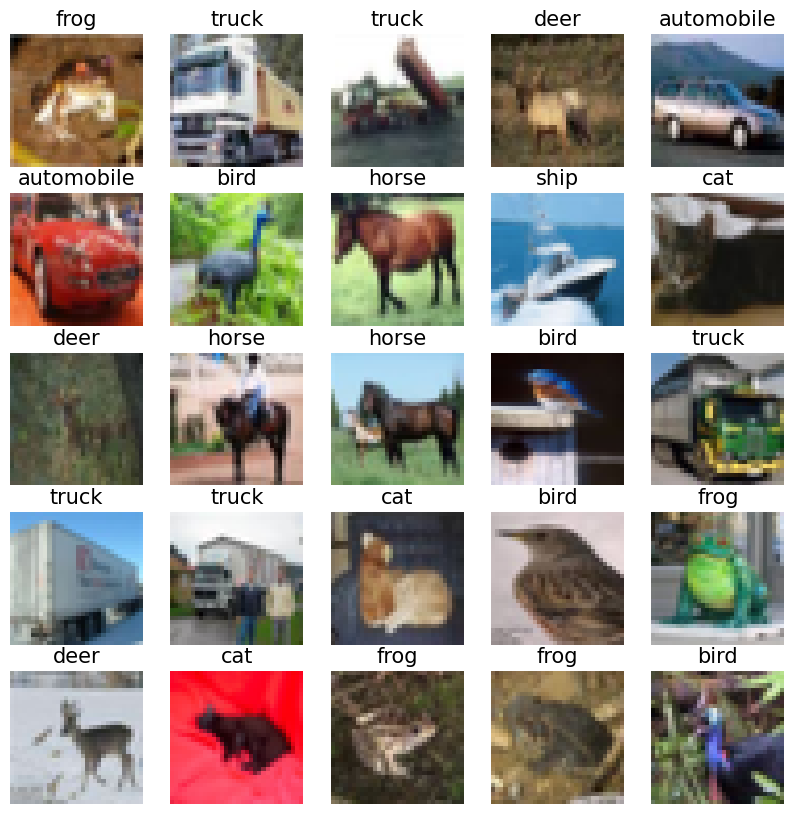

In [4]:
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i])
    plt.title(labels[y_train[i][0]], fontsize = 15)
    plt.axis('off')

In [5]:
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_ds = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [6]:
train_ds

<_TensorSliceDataset element_spec=(TensorSpec(shape=(32, 32, 3), dtype=tf.uint8, name=None), TensorSpec(shape=(1,), dtype=tf.uint8, name=None))>

In [7]:
def process_image(image, label):
    image = tf.image.per_image_standardization(image)
    image = tf.image.resize(image,(64,64))
    return image, label

In [8]:
train_ds_size = tf.data.experimental.cardinality(train_ds).numpy()
test_ds_size = tf.data.experimental.cardinality(test_ds).numpy()
print("Train_size :", train_ds_size)
print("Test_size :", test_ds_size)

Train_size : 50000
Test_size : 10000


In [9]:
train_ds = (train_ds.map(process_image).shuffle(buffer_size=train_ds_size).batch(batch_size=32, drop_remainder = True))
test_ds = (test_ds.map(process_image).shuffle(buffer_size=test_ds_size).batch(batch_size=32, drop_remainder = True))

In [10]:
model = Sequential([
    Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(64,64,3)),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(3,3)),
    Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding = 'same'),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding = 'same'),
    BatchNormalization(),
    Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding = 'same'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Flatten(),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(1024, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 128)       46592     
                                                                 
 batch_normalization (Batch  (None, 14, 14, 128)       512       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 7, 7, 128)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 256)         819456    
                                                                 
 batch_normalization_1 (Bat  (None, 7, 7, 256)         1024      
 chNormalization)                                                
                                                        

In [12]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.optimizers.SGD(learning_rate=0.01),metrics = 'accuracy')

history = model.fit (train_ds, epochs = 10, validation_data = test_ds)

Epoch 1/10
1562/1562 [==============================] - 32s 9ms/step - loss: 1.6830 - accuracy: 0.3950 - val_loss: 1.3095 - val_accuracy: 0.5294
Epoch 2/10
1562/1562 [==============================] - 17s 8ms/step - loss: 1.2793 - accuracy: 0.5457 - val_loss: 1.1107 - val_accuracy: 0.6014
Epoch 3/10
1562/1562 [==============================] - 18s 8ms/step - loss: 1.0787 - accuracy: 0.6197 - val_loss: 1.0136 - val_accuracy: 0.6434
Epoch 4/10
1562/1562 [==============================] - 17s 9ms/step - loss: 0.9426 - accuracy: 0.6708 - val_loss: 0.9552 - val_accuracy: 0.6678
Epoch 5/10
1562/1562 [==============================] - 19s 8ms/step - loss: 0.8349 - accuracy: 0.7124 - val_loss: 0.9056 - val_accuracy: 0.6864
Epoch 6/10
1562/1562 [==============================] - 15s 8ms/step - loss: 0.7356 - accuracy: 0.7467 - val_loss: 0.8447 - val_accuracy: 0.7073
Epoch 7/10
1562/1562 [==============================] - 18s 9ms/step - loss: 0.6508 - accuracy: 0.7771 - val_loss: 0.8490 - val_ac

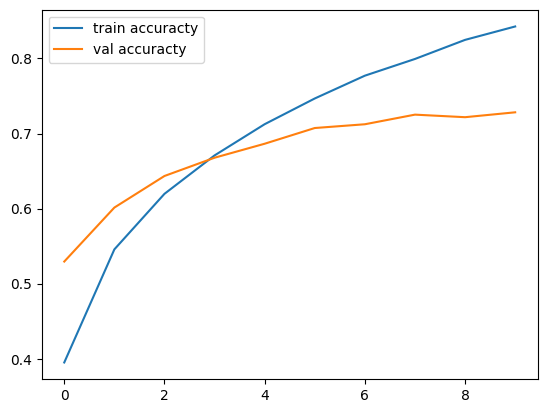

In [13]:
plt.plot(history.history['accuracy'], label = 'train accuracty')
plt.plot(history.history['val_accuracy'], label = 'val accuracty')
plt.legend()